### Wpływ lokalizacji uczelni na zarobki i zatrudnienie absolwentów, badając, czy różnice regionalne oraz prestiż uczelni mają znaczenie dla kariery zawodowej

***f(P_WOJ) = (P_ME_ZAR lub P_WWZ)  i P_WWB***

- ***P_WOJ*** - Województwo lokalizacji jednostki dydaktycznej = P_ME_ZAR i P_WWB

- ***P_ME_ZAR*** - Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł po uzyskaniu dyplomu

- ***P_WWZ*** - Względny Wskaźnik Zarobków absolwentów po uzyskaniu dyplomu

- ***P_WWB*** - Względny Wskaźnik Bezrobocia absolwentów po uzyskaniu dyplomu

In [52]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
from scipy.stats import pearsonr

# Load datasets
graduates_data = pd.read_csv('data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
P_N = students_data['P_N']  # Liczba studentów
P_ABS = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

/tmp/ipykernel_12903/2237196766.py:10: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_12903/2237196766.py:11: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory=False.
  students_data = p

In [53]:
# Convert columns in graduates_data
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB']):
        graduates_data[col] = graduates_data[col].str.replace(',', '.').astype(float)

In [54]:
voivodship_dict = {
    2: "Dolnośląskie",
    4: "Kujawsko-Pomorskie",
    6: "Lubelskie",
    8: "Lubuskie",
    10: "Łódzkie",
    12: "Małopolskie",
    14: "Mazowieckie",
    16: "Opolskie",
    18: "Podkarpackie",
    20: "Podlaskie",
    22: "Pomorskie",
    24: "Śląskie",
    26: "Świętokrzyskie",
    28: "Warmińsko-Mazurskie",
    30: "Wielkopolskie",
    32: "Zachodniopomorskie"
}

In [5]:
def plot_graduate_distribution(data, column, study_type='1', lic_eng='eng', num_bins=10, x_range=(0, 1), title_prefix='', xlabel=''):
    """
    Plots the distribution of the number of graduates (P_N) across specified ranges of a given column.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the data to plot.
    column (str): The column for which the distribution is plotted (e.g., 'P_ME_ZAR', 'P_WWZ').
    study_type (str): The type of study ('S' for full-time, 'N' for part-time).
    num_bins (int): Number of bins for the histogram.
    x_range (tuple): Range of x-axis values for binning.
    title_prefix (str): Prefix for the plot title.
    xlabel (str): Label for the x-axis.
    """
    # Filter data for the specific study type
    data_study = data[data['P_POZIOM'] == study_type]

    if lic_eng == 'eng' and study_type == '1':
        data_study = data_study[data_study['P_N_SEMESTR'].isin([7, 8])]
    elif lic_eng == 'lic' and study_type == '1':
        data_study = data_study[~data_study['P_N_SEMESTR'].isin([7, 8])]


    # Define bin edges
    bins = np.linspace(x_range[0], x_range[1], num_bins + 1)

    # Group data by specified column bins and sum P_N
    study_groups = data_study.groupby(pd.cut(data_study[column], bins=bins))['P_N'].sum()

    # Plot the grouped data
    study_groups.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{title_prefix} Distribution of Number of Graduates (P_N) Across {xlabel} Ranges for {"Full-Time" if study_type == "S" else "Part-Time"} Studies (P_FORMA = {study_type})')
    plt.xlabel(xlabel)
    plt.ylabel('Number of Graduates')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [6]:
def plot_graduate_distribution(data, column, study_type='1', lic_eng='eng', num_bins=10, x_range=(0, 1), title_prefix='', xlabel='', color_scheme=('green', 'blue')):
    """
    Plots the distribution of the number of graduates (P_N) across specified ranges of a given column.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the data to plot.
    column (str): The column for which the distribution is plotted (e.g., 'P_ME_ZAR', 'P_WWZ').
    study_type (str): The type of study ('S' for full-time, 'N' for part-time).
    num_bins (int): Number of bins for the histogram.
    x_range (tuple): Range of x-axis values for binning.
    title_prefix (str): Prefix for the plot title.
    xlabel (str): Label for the x-axis.
    color_scheme (tuple): Tuple of colors for full-time and part-time studies.
    """
    # Filter data for the specific study type
    data_study = data[data['P_POZIOM'] == study_type]

    if lic_eng == 'eng' and study_type == '1':
        data_study = data_study[data_study['P_N_SEMESTR'].isin([7, 8])]
    elif lic_eng == 'lic' and study_type == '1':
        data_study = data_study[~data_study['P_N_SEMESTR'].isin([7, 8])]

    # Plot the histogram with KDE overlay
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=data_study, 
        x=column, 
        weights='P_N', 
        bins=num_bins, 
        binrange=x_range, 
        kde=False, 
        color=color_scheme[0] if study_type == 'S' else color_scheme[1], 
        edgecolor="black", 
        alpha=0.6, 
        stat="count"
    )
    plt.title(f'{title_prefix} Distribution of Number of Graduates (P_N) Across {xlabel} Ranges for {study_type}')
    plt.xlabel(xlabel)
    plt.ylabel('Number of Graduates')
    plt.xlim(x_range)
    plt.tight_layout()
    plt.show()

<Figure size 1400x800 with 0 Axes>

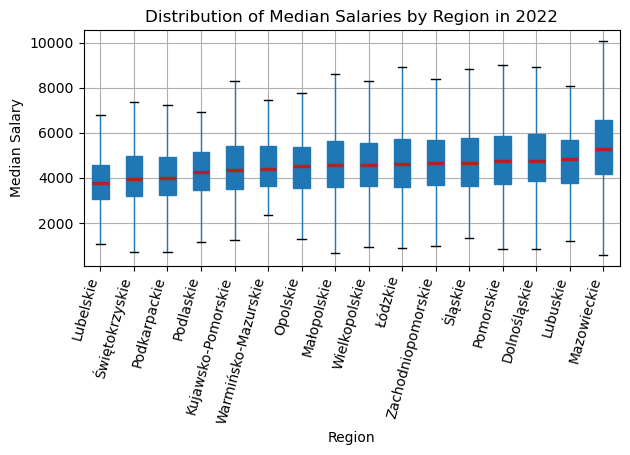

In [7]:
desired_year = 2022  # Replace with your desired graduation year

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_ME_ZAR', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the year 2022
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

# Compute median salary per region to sort them
median_salary_per_region = temp_data.groupby('P_WOJ_NAZWA')['P_ME_ZAR'].median().sort_values()

# Sort 'wojewodztwa' by median salary in ascending order
temp_data['P_WOJ_NAZWA'] = pd.Categorical(
    temp_data['P_WOJ_NAZWA'], 
    categories=median_salary_per_region.index, 
    ordered=True
)

# Plot boxplot for the salary distribution
plt.figure(figsize=(14, 8))
temp_data.boxplot(column='P_ME_ZAR', by='P_WOJ_NAZWA', grid=True, showfliers=False, patch_artist=True, medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick'))

# Apply unique colors to each box
num_wojewodztw = len(temp_data['P_WOJ_NAZWA'].unique())
colors = cm.get_cmap('tab20', num_wojewodztw)
for i, patch in enumerate(plt.gca().artists):
    patch.set_facecolor(colors(i))

# Plot settings
plt.title(f"Distribution of Median Salaries by Region in {desired_year}")
plt.suptitle("")
plt.xlabel("Region")
plt.ylabel("Median Salary")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

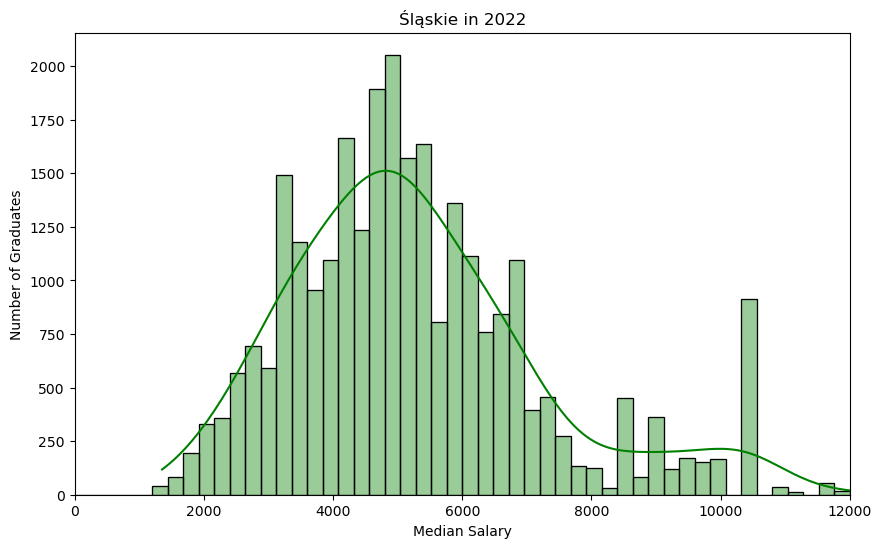

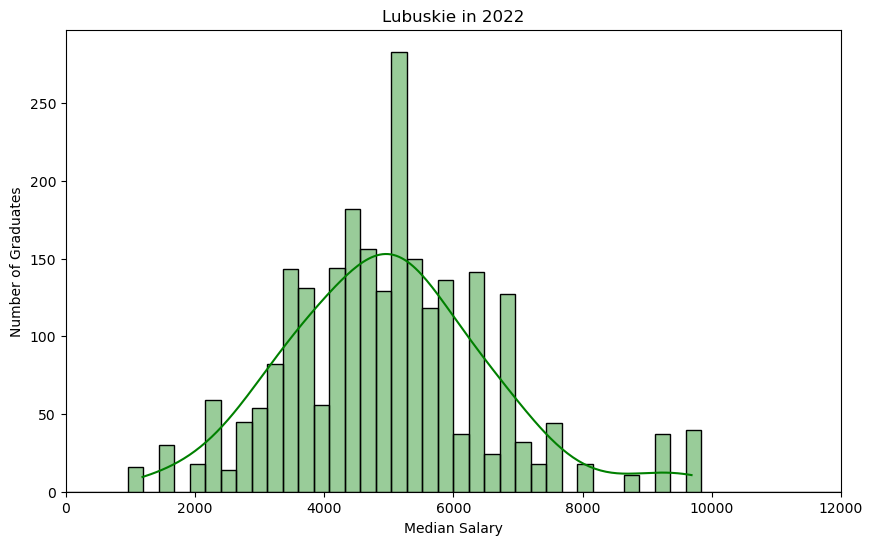

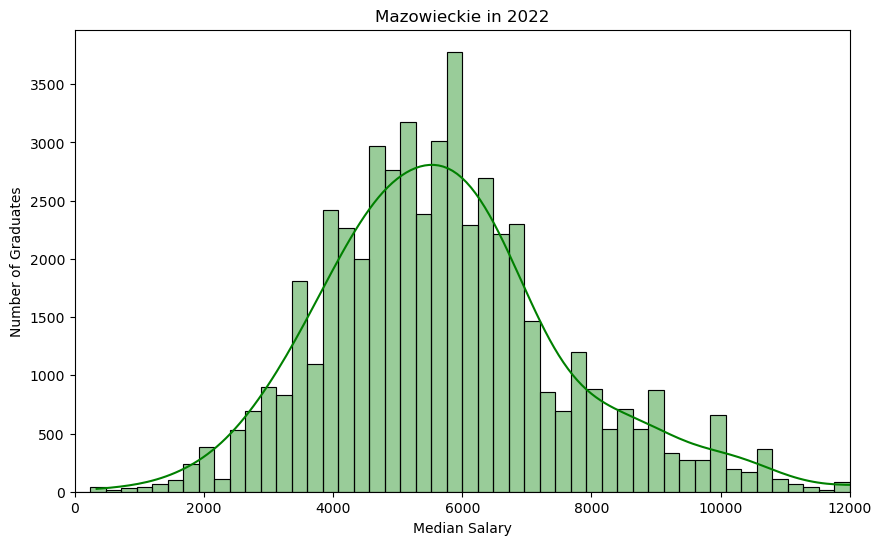

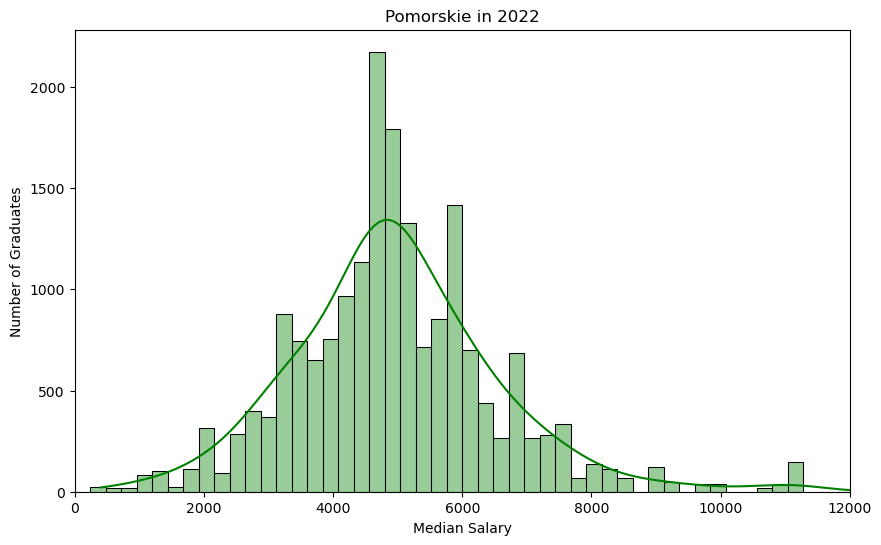

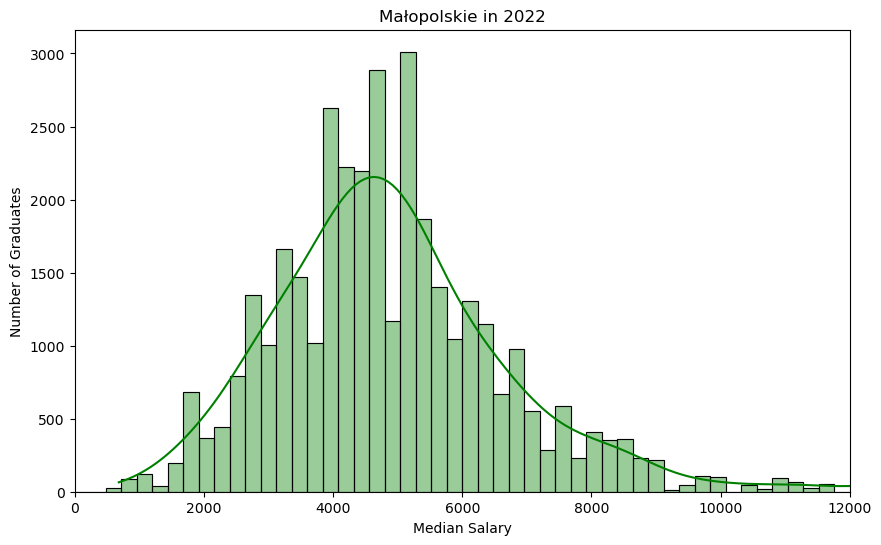

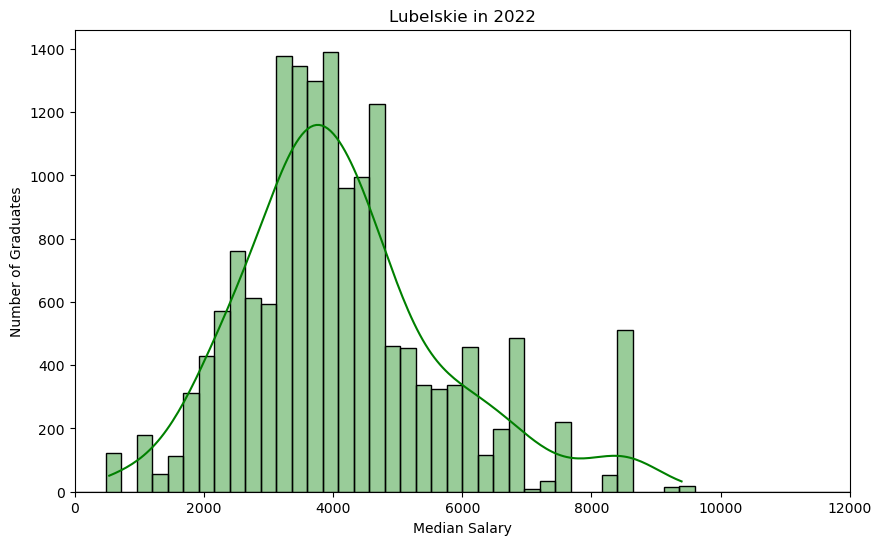

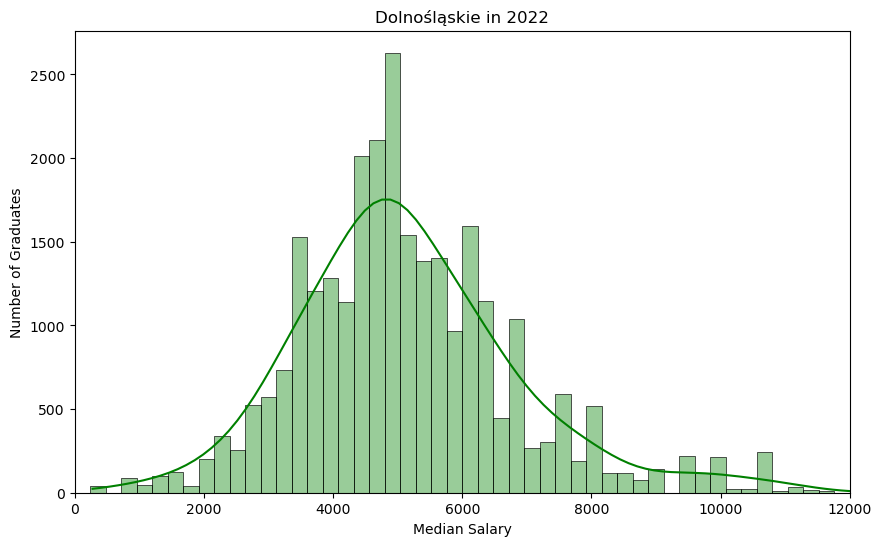

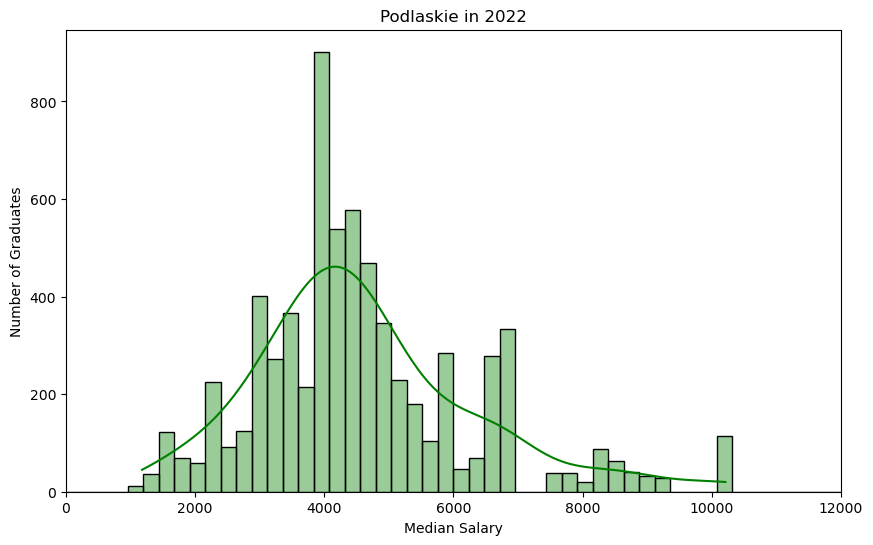

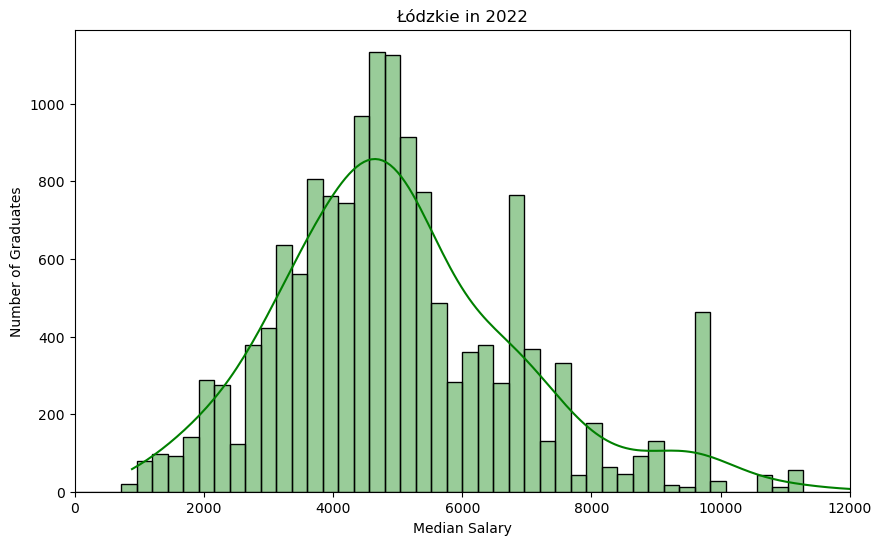

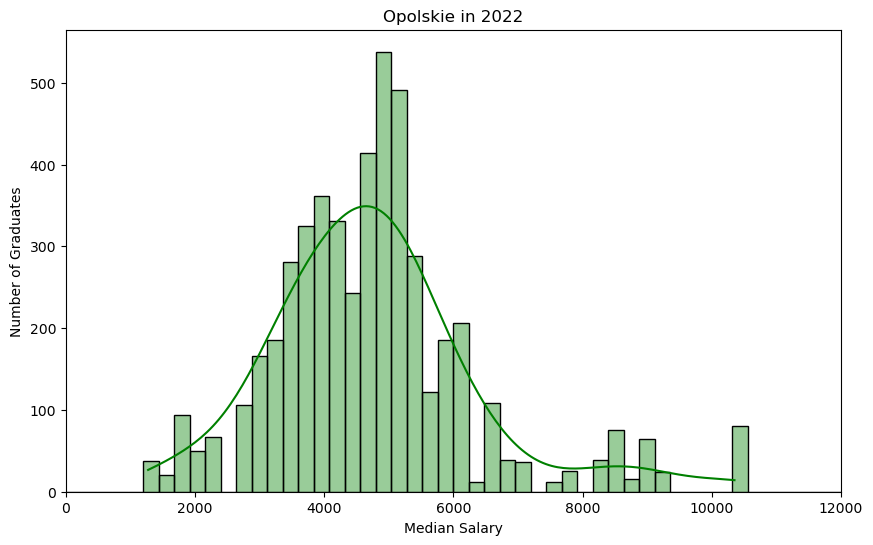

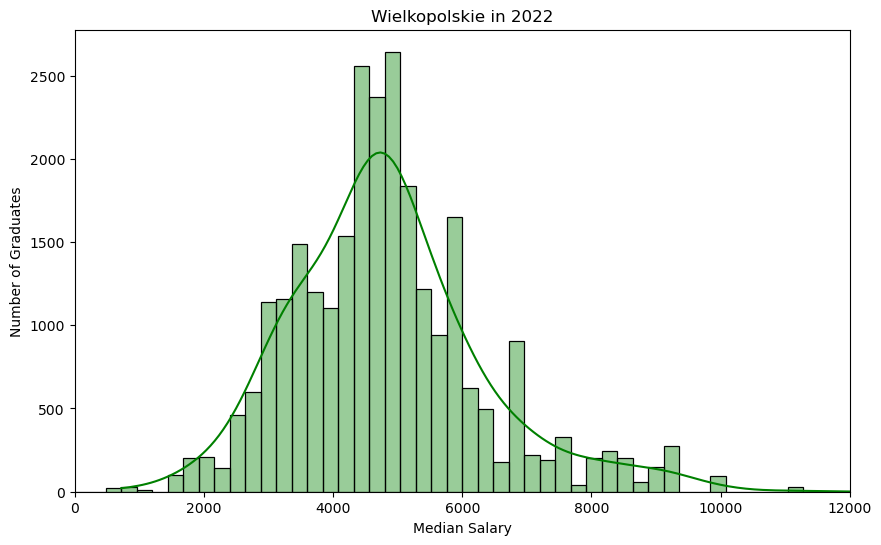

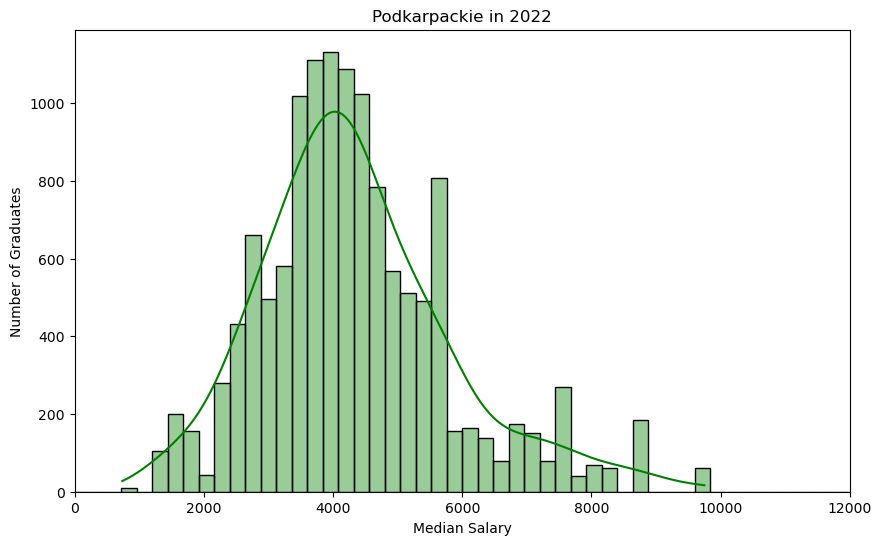

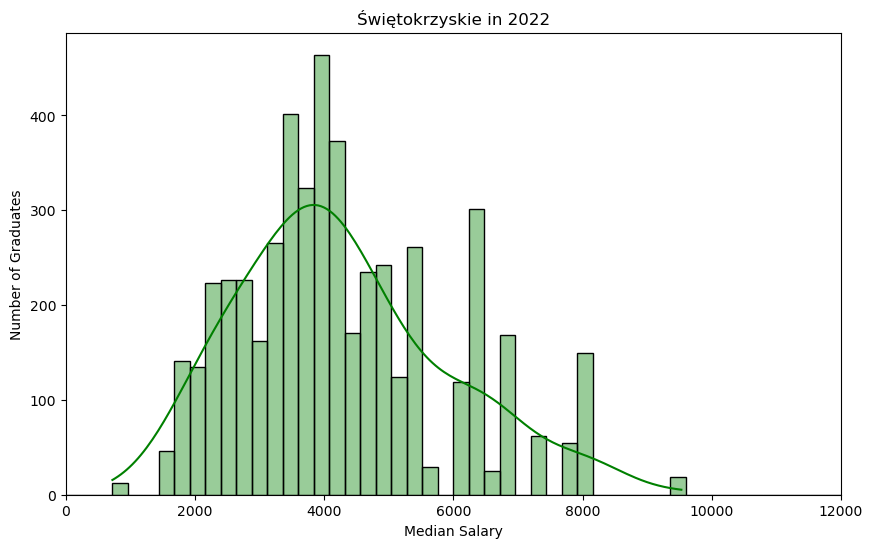

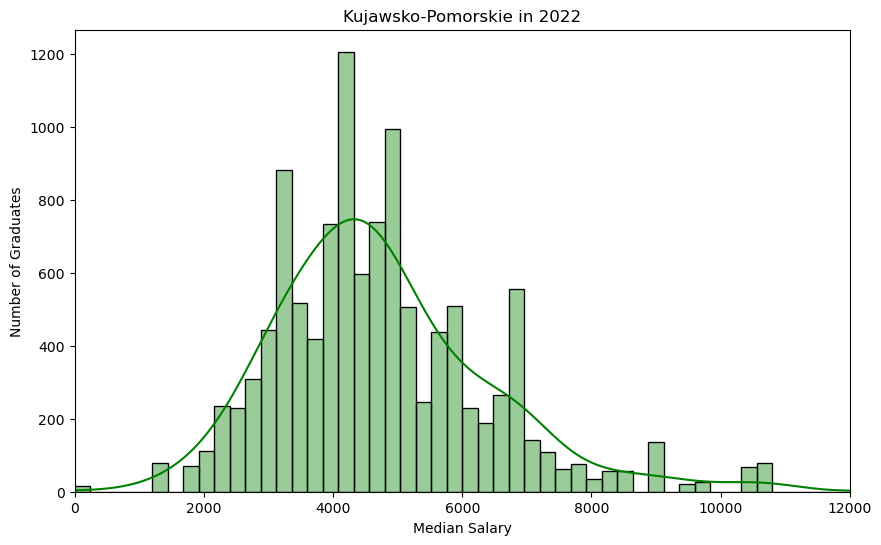

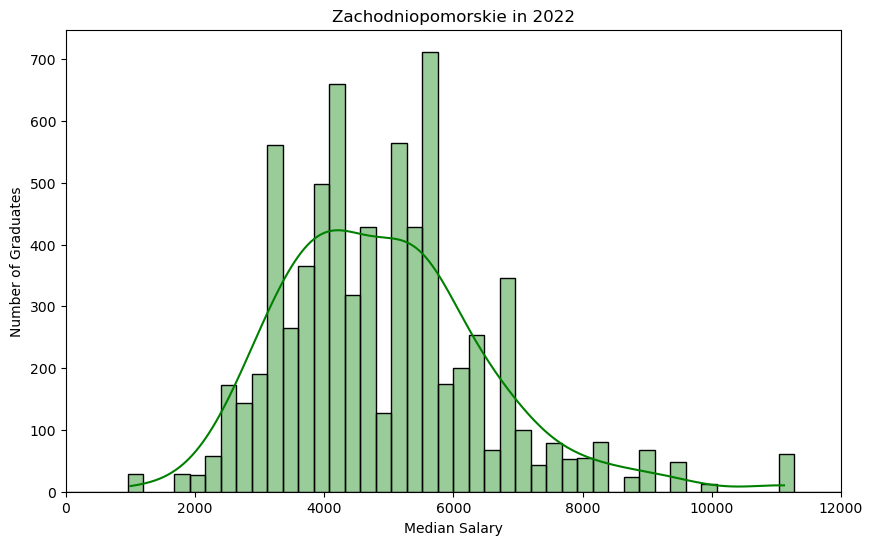

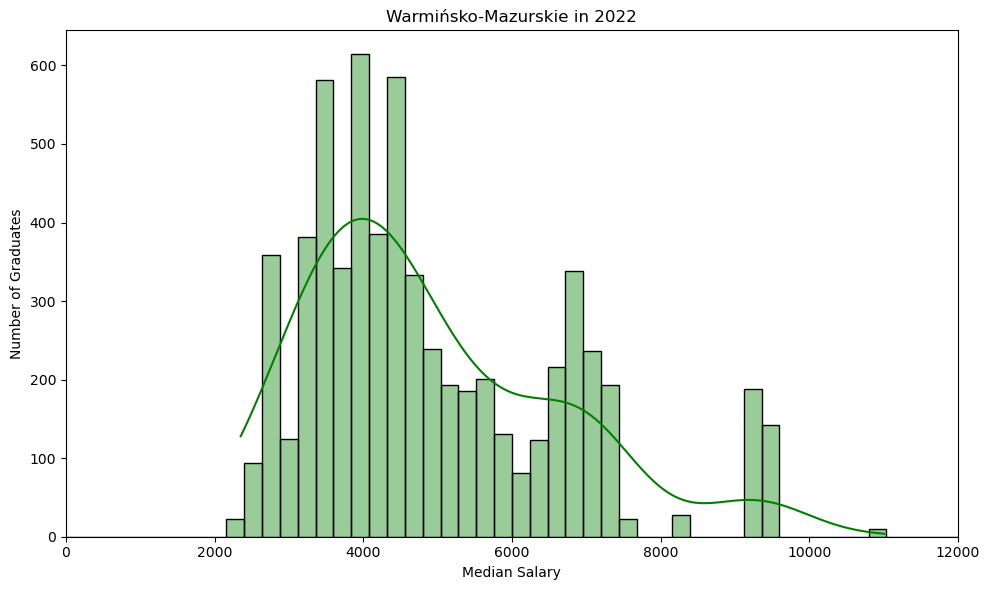

In [8]:
desired_year = 2022  # Replace with your desired graduation year
num_bins = 50
x_range = (0, 12000)

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_ME_ZAR', 'P_N', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the year 2022
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

num_voivodships = temp_data['P_WOJ_NAZWA'].nunique()

for i, voivodship in enumerate(temp_data['P_WOJ_NAZWA'].unique(), 1):
    if len(temp_data[temp_data['P_WOJ_NAZWA'] == voivodship]) > 1:
        plt.figure(figsize=(10, 6))
        sns.histplot(
            data=temp_data[temp_data['P_WOJ_NAZWA'] == voivodship], 
            x='P_ME_ZAR', 
            weights='P_N', 
            color='green',
            alpha=0.4,
            stat='count',
            bins=num_bins,
            binrange=x_range, 
            kde=True
        )
        plt.title(f"{voivodship} in {desired_year}")
        plt.xlim(x_range)
        plt.xlabel("Median Salary")
        plt.ylabel("Number of Graduates")

plt.tight_layout()
plt.show()


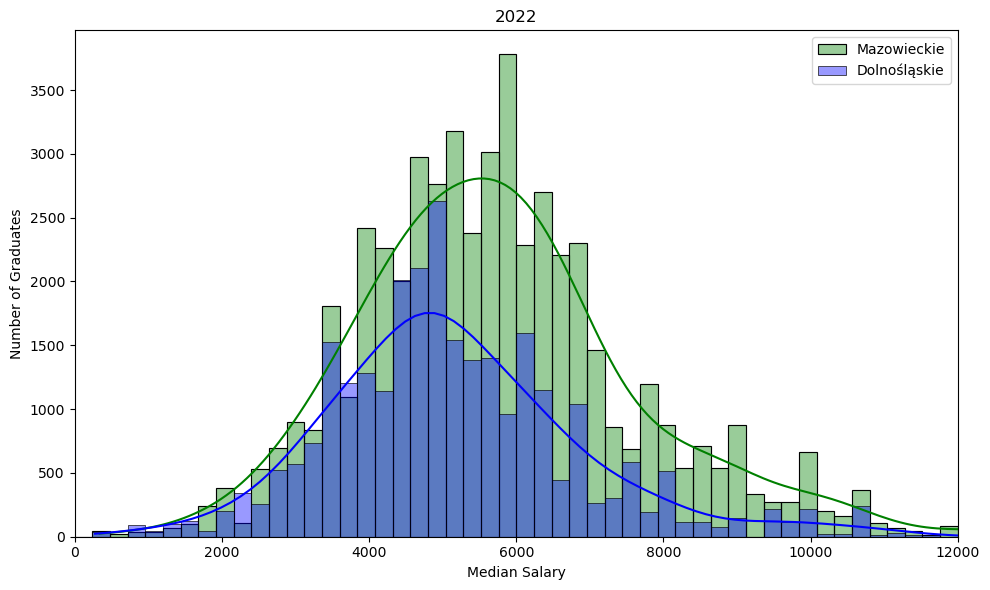

In [9]:
desired_year = 2022  # Replace with your desired graduation year
num_bins = 50
x_range = (0, 12000)

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_ME_ZAR', 'P_N', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the year 2022
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

num_voivodships = temp_data['P_WOJ_NAZWA'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(
    data=temp_data[temp_data['P_WOJ_NAZWA'] == 'Mazowieckie'], 
    x='P_ME_ZAR', 
    weights='P_N', 
    color='green',
    alpha=0.4,
    stat='count',
    bins=num_bins,
    binrange=x_range, 
    label='Mazowieckie',
    kde=True
)
sns.histplot(
    data=temp_data[temp_data['P_WOJ_NAZWA'] == 'Dolnośląskie'], 
    x='P_ME_ZAR', 
    weights='P_N', 
    color='blue',
    alpha=0.4,
    stat='count',
    bins=num_bins,
    binrange=x_range, 
    label='Dolnośląskie',
    kde=True
)
plt.title(f"{desired_year}")
plt.xlim(x_range)
plt.xlabel("Median Salary")
plt.ylabel("Number of Graduates")
plt.legend()

plt.tight_layout()
plt.show()


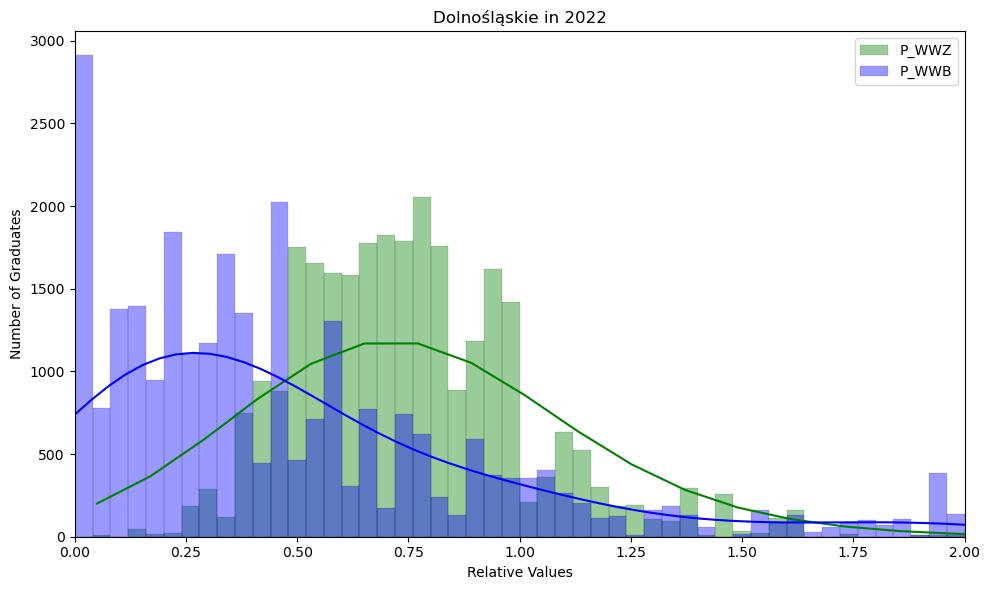

In [39]:
desired_year = 2022  # Replace with your desired graduation year
num_bins = 50
x_range = (0, 2)
voivodship_selected = 'Dolnośląskie'

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_WWZ', 'P_WWB', 'P_N', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the year 2022
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

num_voivodships = temp_data['P_WOJ_NAZWA'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(
    data=temp_data[temp_data['P_WOJ_NAZWA'] == voivodship_selected], 
    x='P_WWZ', 
    weights='P_N', 
    color='green',
    alpha=0.4,
    stat='count',
    bins=num_bins,
    binrange=x_range, 
    label='P_WWZ',
    kde=True
)
sns.histplot(
    data=temp_data[temp_data['P_WOJ_NAZWA'] == voivodship_selected], 
    x='P_WWB', 
    weights='P_N', 
    color='blue',
    alpha=0.4,
    stat='count',
    bins=num_bins,
    binrange=x_range, 
    label='P_WWB',
    kde=True
)
plt.title(f"{voivodship_selected} in {desired_year}")
plt.xlim(x_range)
plt.xlabel("Relative Values")
plt.ylabel("Number of Graduates")
plt.legend()

plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

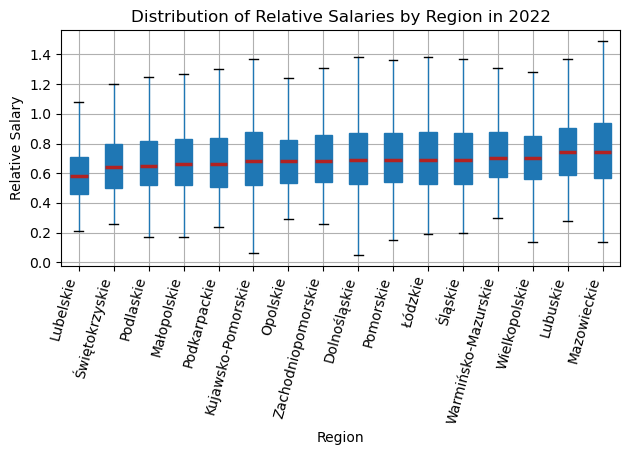

In [16]:
desired_year = 2022  # Replace with your desired graduation year

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_WWZ', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the year 2022
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

# Compute median salary per region to sort them
median_salary_per_region = temp_data.groupby('P_WOJ_NAZWA')['P_WWZ'].median().sort_values()

# Sort 'wojewodztwa' by median salary in ascending order
temp_data['P_WOJ_NAZWA'] = pd.Categorical(
    temp_data['P_WOJ_NAZWA'], 
    categories=median_salary_per_region.index, 
    ordered=True
)

# Plot boxplot for the salary distribution
plt.figure(figsize=(14, 8))
temp_data.boxplot(column='P_WWZ', by='P_WOJ_NAZWA', grid=True, showfliers=False, patch_artist=True, medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick'))

# Apply unique colors to each box
num_wojewodztw = len(temp_data['P_WOJ_NAZWA'].unique())
colors = cm.get_cmap('tab20', num_wojewodztw)
for i, patch in enumerate(plt.gca().artists):
    patch.set_facecolor(colors(i))

# Plot settings
plt.title(f"Distribution of Relative Salaries by Region in {desired_year}")
plt.suptitle("")
plt.xlabel("Region")
plt.ylabel("Relative Salary")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

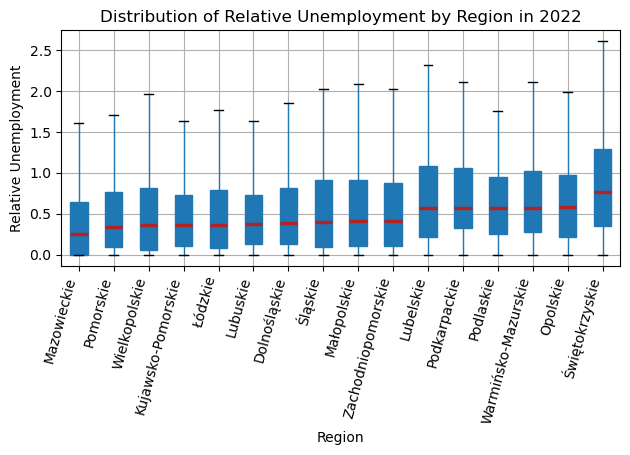

In [12]:
desired_year = 2022  # Replace with your desired graduation year

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_WWB', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the year 2022
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

# Compute median salary per region to sort them
median_salary_per_region = temp_data.groupby('P_WOJ_NAZWA')['P_WWB'].median().sort_values()

# Sort 'wojewodztwa' by median salary in ascending order
temp_data['P_WOJ_NAZWA'] = pd.Categorical(
    temp_data['P_WOJ_NAZWA'], 
    categories=median_salary_per_region.index, 
    ordered=True
)

# Plot boxplot for the salary distribution
plt.figure(figsize=(14, 8))
temp_data.boxplot(column='P_WWB', by='P_WOJ_NAZWA', grid=True, showfliers=False, patch_artist=True, medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick'))

# Apply unique colors to each box
num_wojewodztw = len(temp_data['P_WOJ_NAZWA'].unique())
colors = cm.get_cmap('tab20', num_wojewodztw)
for i, patch in enumerate(plt.gca().artists):
    patch.set_facecolor(colors(i))

# Plot settings
plt.title(f"Distribution of Relative Unemployment by Region in {desired_year}")
plt.suptitle("")
plt.xlabel("Region")
plt.ylabel("Relative Unemployment")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

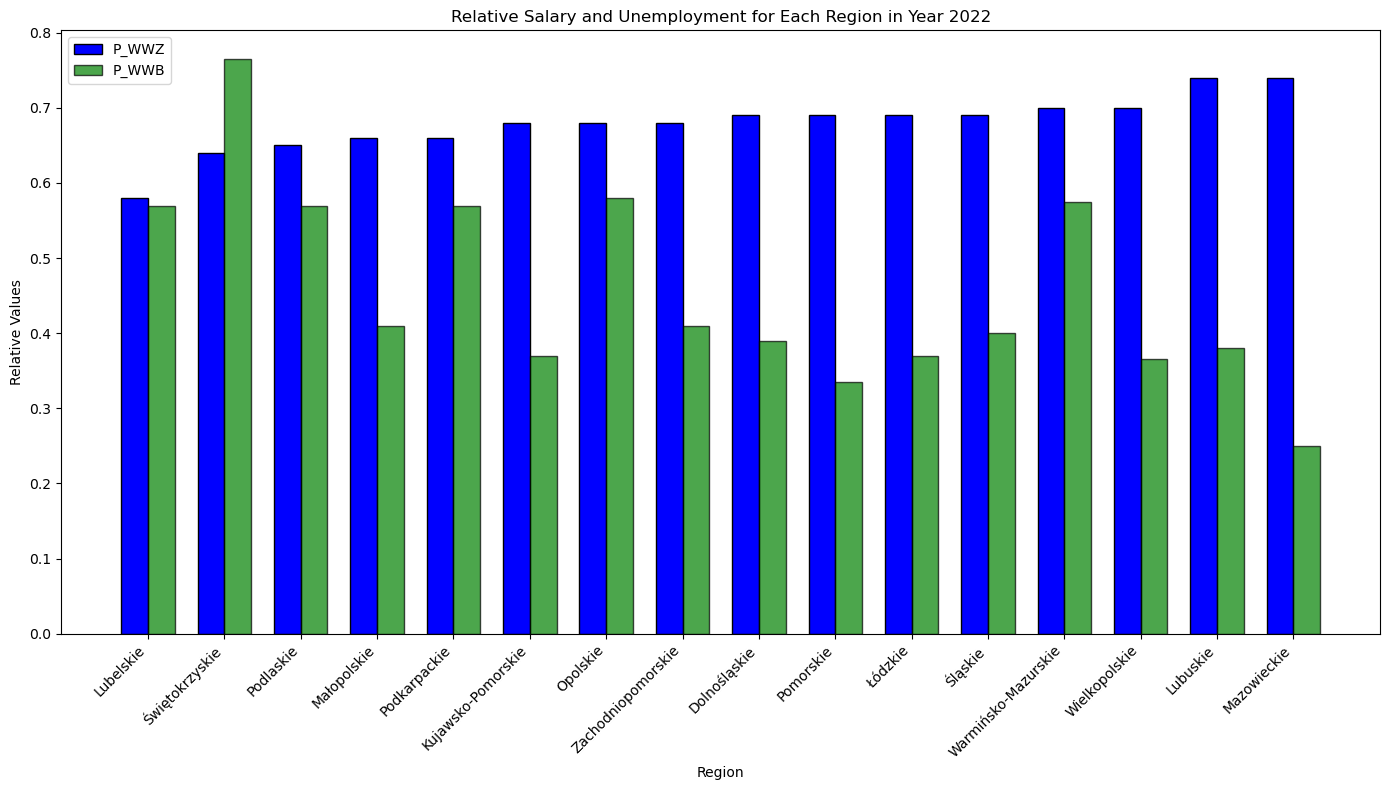

In [40]:
desired_year = 2022  # Replace with your desired graduation year

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_WWZ', 'P_WWB', 'P_N', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the desired year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

# Group data by region and calculate the median salary
grouped_data = temp_data.groupby('P_WOJ_NAZWA')[['P_WWZ', 'P_WWB']].median().reset_index()

# Sort the data by P_WWZ
grouped_data = grouped_data.sort_values(by='P_WWZ', ascending=True)

# Plot the data
plt.figure(figsize=(14, 8))
bar_width = 0.35  # Width of the bars
index = np.arange(len(grouped_data['P_WOJ_NAZWA']))

# Plotting bars for P_WWZ and P_WWB side by side
plt.bar(index, grouped_data['P_WWZ'], bar_width, label='P_WWZ', color='blue', edgecolor='black')
plt.bar(index + bar_width, grouped_data['P_WWB'], bar_width, label='P_WWB', color='green', edgecolor='black', alpha=0.7)

plt.title('Relative Salary and Unemployment for Each Region in Year {}'.format(desired_year))
plt.xlabel('Region')
plt.ylabel('Relative Values')
plt.xticks(index + bar_width / 2, grouped_data['P_WOJ_NAZWA'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


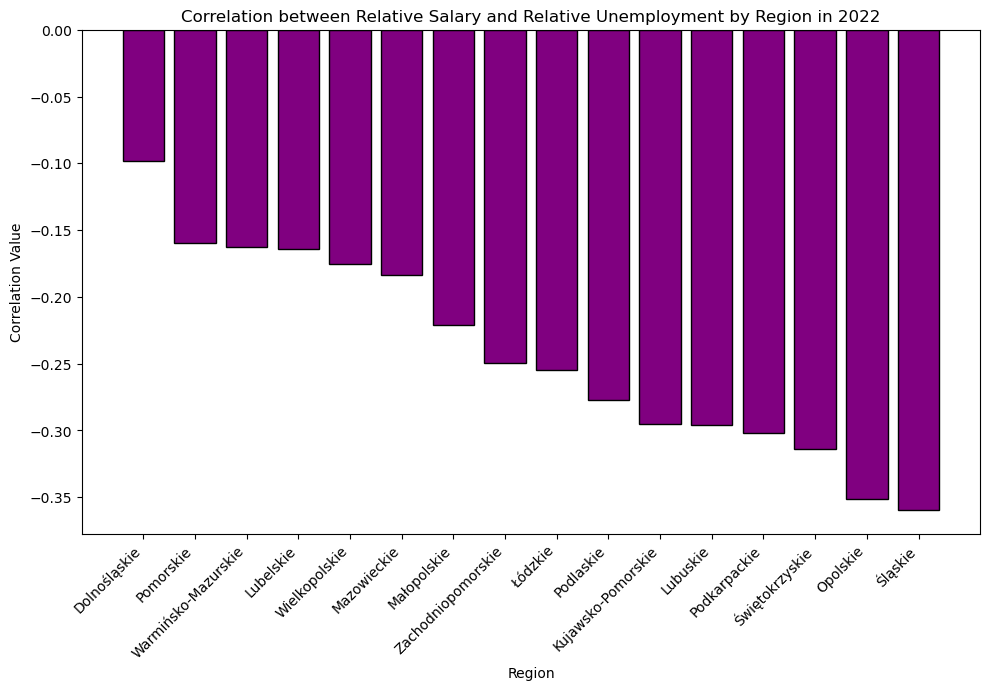

In [29]:
desired_year = 2022  # Replace with your desired graduation year

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_WWZ', 'P_WWB', 'P_N', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the desired year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

# Group data by region and calculate the correlation
correlation_results = temp_data.groupby('P_WOJ_NAZWA')[['P_WWZ', 'P_WWB']].corr().iloc[0::2, -1].reset_index()
correlation_results.columns = ['Region', 'Metric', 'Correlation']
correlation_results = correlation_results.sort_values(by='Correlation', ascending=False)

# Display correlation results
# print("Correlation between Relative Salary (P_WWZ) and Relative Unemployment (P_WWB) for each region in year {}:".format(desired_year))
# print(correlation_results[['Region', 'Correlation']])

# Optionally, display the results as a plot
plt.figure(figsize=(10, 6))
plt.bar(correlation_results['Region'], correlation_results['Correlation'], color='purple', edgecolor='black')
plt.ylabel('Correlation Value')
plt.xlabel('Region')
plt.title(f'Correlation between Relative Salary and Relative Unemployment by Region in {desired_year}')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

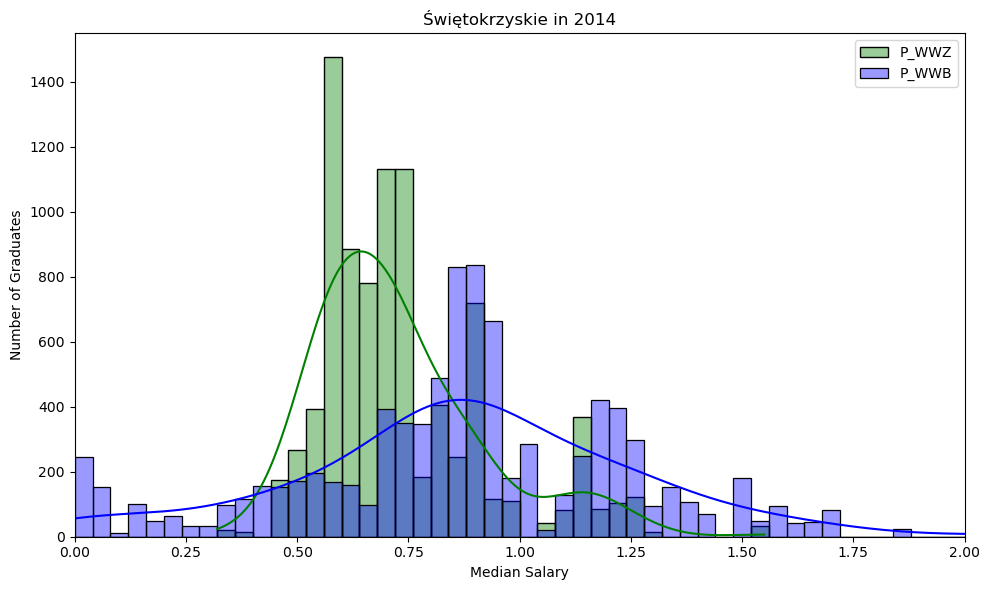

In [41]:
desired_year = 2014  # Replace with your desired graduation year
num_bins = 50
x_range = (0, 2)
voivodship_selected = 'Świętokrzyskie'

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_WWZ', 'P_WWB', 'P_N', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the year 2022
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

num_voivodships = temp_data['P_WOJ_NAZWA'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(
    data=temp_data[temp_data['P_WOJ_NAZWA'] == voivodship_selected], 
    x='P_WWZ', 
    weights='P_N', 
    color='green',
    alpha=0.4,
    stat='count',
    bins=num_bins,
    binrange=x_range, 
    label='P_WWZ',
    kde=True
)
sns.histplot(
    data=temp_data[temp_data['P_WOJ_NAZWA'] == voivodship_selected], 
    x='P_WWB', 
    weights='P_N', 
    color='blue',
    alpha=0.4,
    stat='count',
    bins=num_bins,
    binrange=x_range, 
    label='P_WWB',
    kde=True
)
plt.title(f"{voivodship_selected} in {desired_year}")
plt.xlim(x_range)
plt.xlabel("Median Salary")
plt.ylabel("Number of Graduates")
plt.legend()

plt.tight_layout()
plt.show()

## Wykresy dla kierunku Informatyka

/tmp/ipykernel_12903/2742079771.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)
/tmp/ipykernel_12903/2742079771.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)


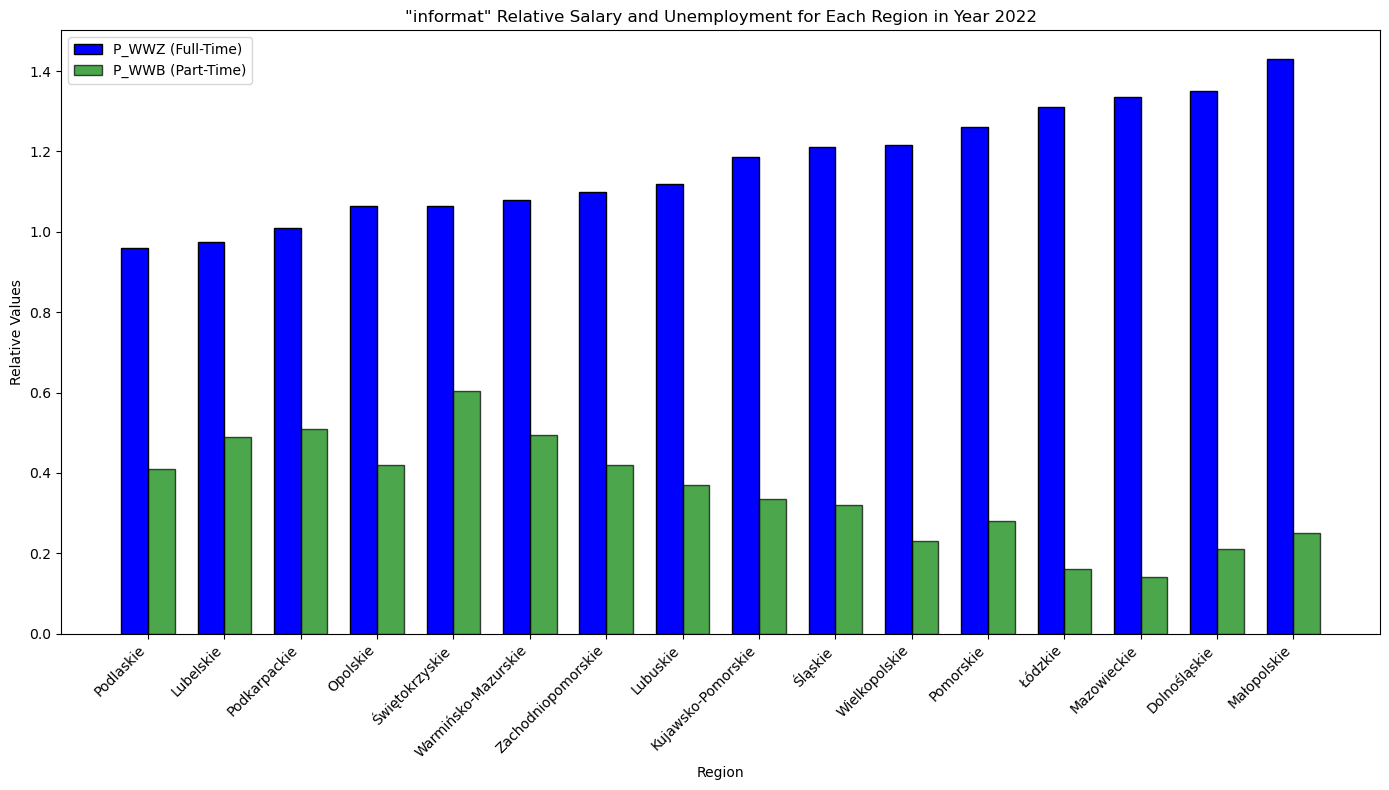

In [49]:
desired_year = 2022  # Replace with your desired graduation year

# Filter the data to only include programs that contain the value in `var` (e.g., 'filologia')
var = 'informat'

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_WWZ', 'P_WWB', 'P_N', 'P_WOJ', 'P_ROKDYP', 'P_KIERUNEK_NAZWA']].copy()

# Filter data for the desired year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

temp_data = graduates_data[graduates_data['P_KIERUNEK_NAZWA'].str.contains(var, case=False, na=False)]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

# Group data by region and calculate the median salary
grouped_data = temp_data.groupby('P_WOJ_NAZWA')[['P_WWZ', 'P_WWB']].median().reset_index()

# Sort the data by P_WWZ
grouped_data = grouped_data.sort_values(by='P_WWZ', ascending=True)

# Plot the data
plt.figure(figsize=(14, 8))
bar_width = 0.35  # Width of the bars
index = np.arange(len(grouped_data['P_WOJ_NAZWA']))

# Plotting bars for P_WWZ and P_WWB side by side
plt.bar(index, grouped_data['P_WWZ'], bar_width, label='P_WWZ (Full-Time)', color='blue', edgecolor='black')
plt.bar(index + bar_width, grouped_data['P_WWB'], bar_width, label='P_WWB (Part-Time)', color='green', edgecolor='black', alpha=0.7)

plt.title(f'"{var}" Relative Salary and Unemployment for Each Region in Year {desired_year}')
plt.xlabel('Region')
plt.ylabel('Relative Values')
plt.xticks(index + bar_width / 2, grouped_data['P_WOJ_NAZWA'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_12903/2503017700.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)
/tmp/ipykernel_12903/2503017700.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)


            P_WOJ_NAZWA  P_ME_ZAR
7          Podkarpackie  4494.880
8             Podlaskie  4719.820
2             Lubelskie  4760.040
15       Świętokrzyskie  4820.480
10  Warmińsko-Mazurskie  5024.735
6              Opolskie  5189.665
12   Zachodniopomorskie  5644.510
3              Lubuskie  5696.750
1    Kujawsko-Pomorskie  6022.135
14              Śląskie  6349.670
11        Wielkopolskie  6354.260
13              Łódzkie  6761.045
9             Pomorskie  7009.340
0          Dolnośląskie  7292.580
5           Małopolskie  7630.110
4           Mazowieckie  7829.465


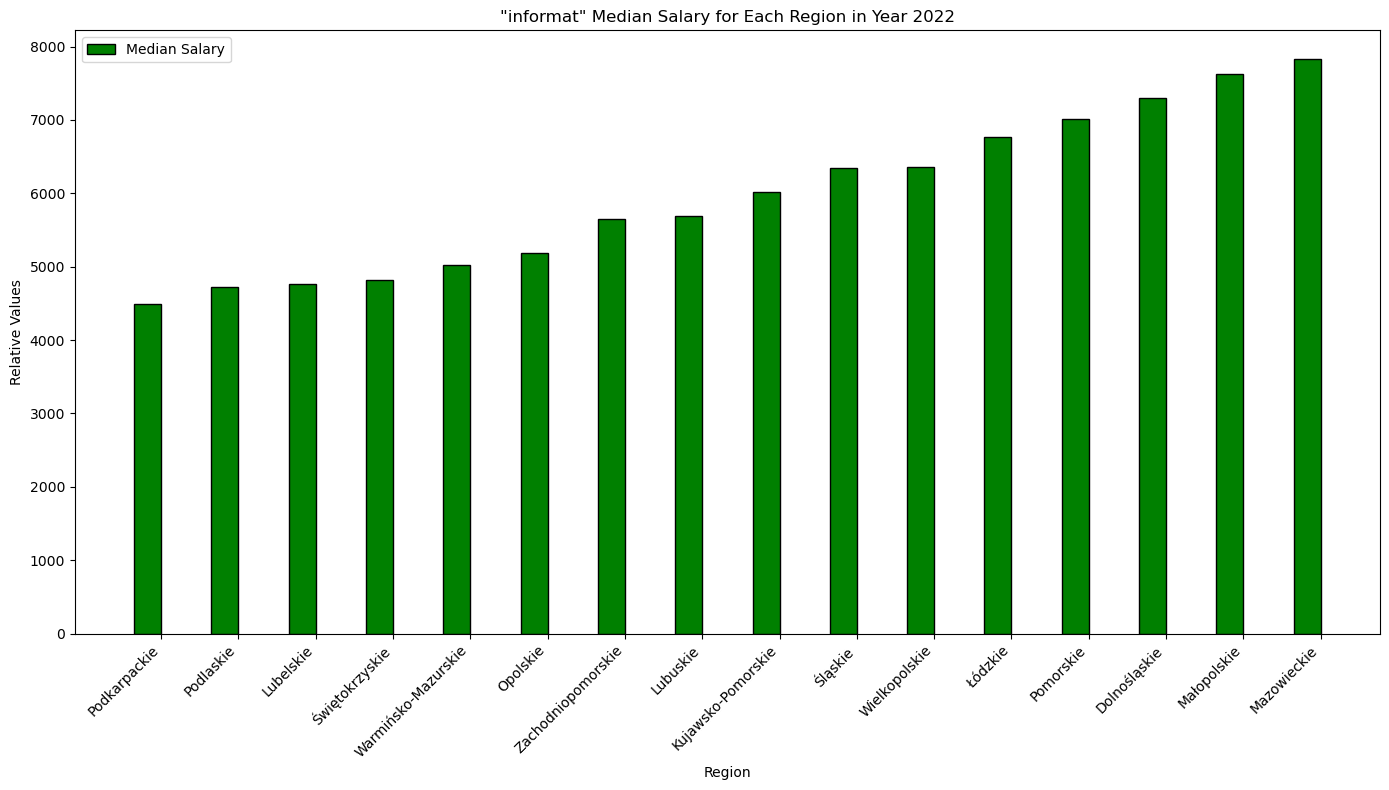

In [47]:
desired_year = 2022  # Replace with your desired graduation year

# Filter the data to only include programs that contain the value in `var` (e.g., 'filologia')
var = 'informat'

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_ME_ZAR', 'P_N', 'P_WOJ', 'P_ROKDYP', 'P_KIERUNEK_NAZWA']].copy()

# Filter data for the desired year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

temp_data = graduates_data[graduates_data['P_KIERUNEK_NAZWA'].str.contains(var, case=False, na=False)]

# Map names of 'wojewodztwa'
temp_data['P_WOJ_NAZWA'] = temp_data['P_WOJ'].map(voivodship_dict)

# Group data by region and calculate the median salary
grouped_data = temp_data.groupby('P_WOJ_NAZWA')[['P_ME_ZAR']].median().reset_index()

# Sort the data by P_WWZ
grouped_data = grouped_data.sort_values(by='P_ME_ZAR', ascending=True)

# Plot the data
plt.figure(figsize=(14, 8))
bar_width = 0.35  # Width of the bars
index = np.arange(len(grouped_data['P_WOJ_NAZWA']))

print(grouped_data)

# Plotting bars for P_WWZ and P_WWB side by side
plt.bar(index, grouped_data['P_ME_ZAR'], bar_width, label='Median Salary', color='green', edgecolor='black')

plt.title(f'"{var}" Median Salary for Each Region in Year {desired_year}')
plt.xlabel('Region')
plt.ylabel('Relative Values')
plt.xticks(index + bar_width / 2, grouped_data['P_WOJ_NAZWA'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


                                     P_NAZWA_UCZELNI  P_ME_ZAR
6  Politechnika Rzeszowska im. Ignacego Łukasiewicza   7882.27
3                              Politechnika Lubelska   8633.92
9                                Politechnika Śląska   9171.31
4                               Politechnika Opolska   9219.93
5                             Politechnika Poznańska   9929.81
8                                Politechnika Łódzka  10742.46
2     Politechnika Krakowska im. Tadeusza Kościuszki  11211.25
0  Politechnika Bydgoska im. Jana i Jędrzeja Śnia...  12553.64
7                            Politechnika Warszawska  14546.60
1                               Politechnika Gdańska  15999.73


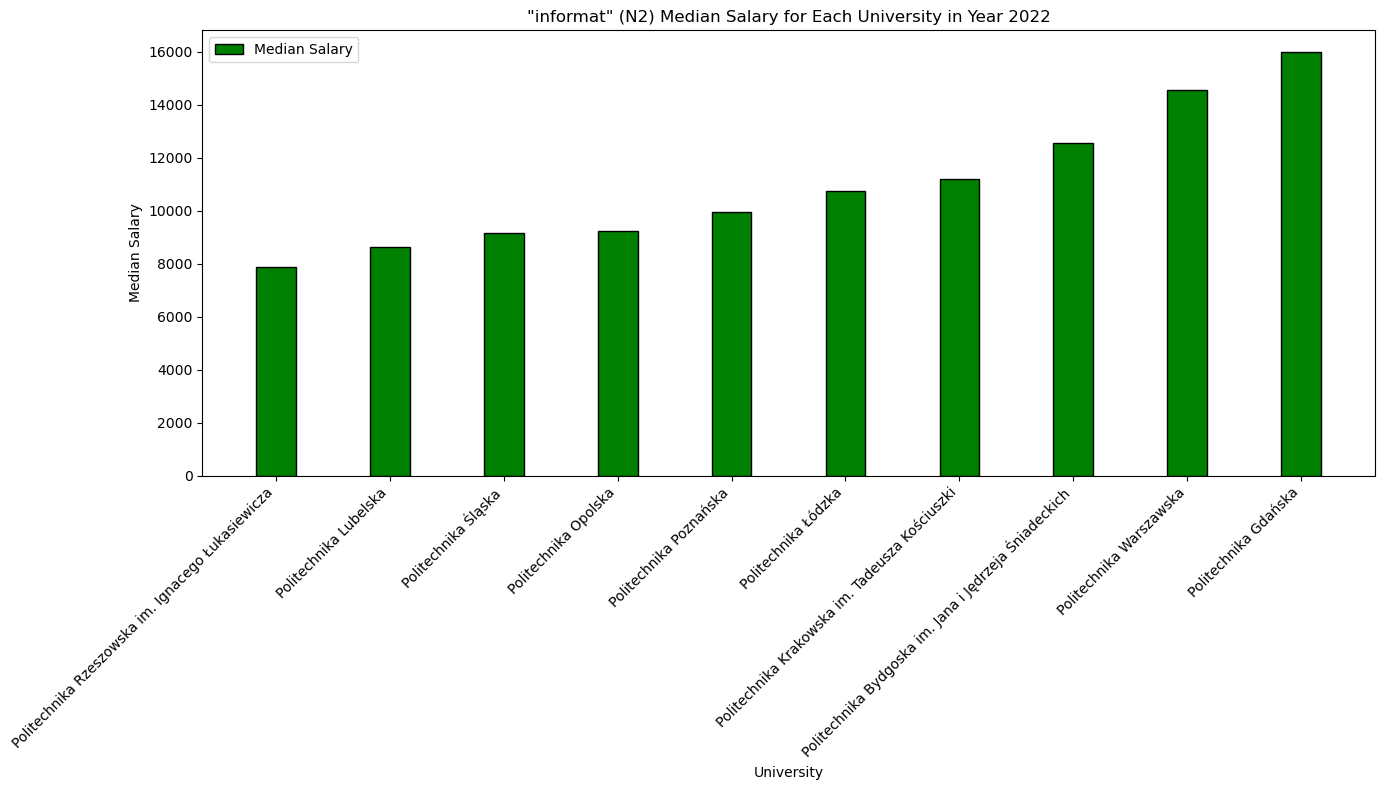

In [ ]:
desired_year = 2022  # Replace with your desired graduation year

# Filter the data to only include programs that contain the value in `var` (e.g., 'filologia')
var = 'informat'
uni = 'Politechnika'
# uni_list = ['Politechnika Warszawska', 'Politechnika Wrocławska', 'Politechnika Gdańska']
forma = 'S'
poziom = '1'

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_ME_ZAR', 'P_N', 'P_WOJ', 'P_ROKDYP', 'P_KIERUNEK_NAZWA', 'P_NAZWA_UCZELNI', 'P_FORMA', 'P_POZIOM']].copy()

# Filter data for the desired year
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

temp_data = temp_data[temp_data['P_KIERUNEK_NAZWA'].str.contains(var, case=False, na=False)]

temp_data = temp_data[temp_data['P_FORMA'] == forma]

temp_data = temp_data[temp_data['P_POZIOM'] == poziom]


temp_data = temp_data[temp_data['P_NAZWA_UCZELNI'].str.contains(uni, case=False, na=False)]
# temp_data = temp_data[temp_data['P_NAZWA_UCZELNI'].isin(uni_list)]



# Group data by region and calculate the median salary
grouped_data = temp_data.groupby('P_NAZWA_UCZELNI')[['P_ME_ZAR']].median().reset_index()

# Sort the data by P_WWZ
grouped_data = grouped_data.sort_values(by='P_ME_ZAR', ascending=True)

# Plot the data
plt.figure(figsize=(14, 8))
bar_width = 0.35  # Width of the bars
index = np.arange(len(grouped_data['P_NAZWA_UCZELNI']))

print(grouped_data)

# Plotting bars for P_WWZ and P_WWB side by side
plt.bar(index, grouped_data['P_ME_ZAR'], bar_width, label='Median Salary', color='green', edgecolor='black')

plt.title(f'"{var}" ({forma}{poziom}) Median Salary for Each University in Year {desired_year}')
plt.xlabel('University')
plt.ylabel('Median Salary')
plt.xticks(index, grouped_data['P_NAZWA_UCZELNI'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
